In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pt
import numpy as np

pt.texon()

/usr/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [43]:
data=pd.read_table('https://impfdashboard.de/static/data/germany_vaccinations_timeseries_v2.tsv')
data['date'] = pd.to_datetime(data['date'])

data["erst_daily"] = data.dosen_erst_kumulativ.diff(1)
data["zweit_daily"] = data.dosen_zweit_kumulativ.diff(1)
data["dritt_daily"] = data.dosen_dritt_kumulativ.diff(1)

data["erst_rollingmean"] = data.rolling(window=7)["erst_daily"].mean()
data["zweit_rollingmean"] = data.rolling(window=7)["zweit_daily"].mean()
data["dritt_rollingmean"] = data.rolling(window=7)["dritt_daily"].mean()


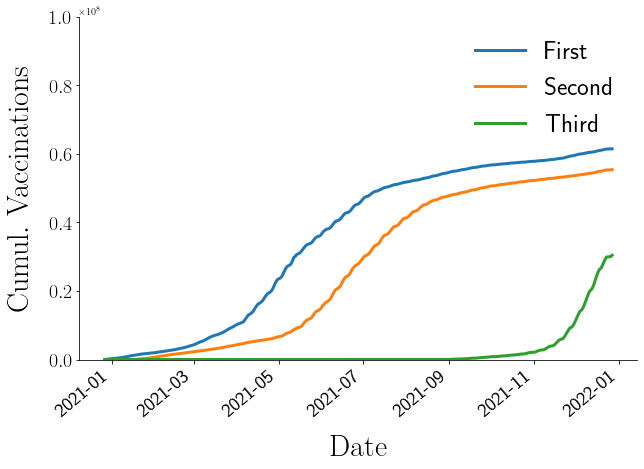

In [48]:
fig, ax = pt.singleplot()
pt.majorline(ax, data.date, data.dosen_erst_kumulativ, label="First")
pt.majorline(ax,data.date, data.dosen_zweit_kumulativ, label="Second")
pt.majorline(ax,data.date, data.dosen_dritt_kumulativ, label="Third")

fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, pt.tex("Date"), pt.tex("Cumul. Vaccinations"))
pt.limits(ax, None, (0,1e8))


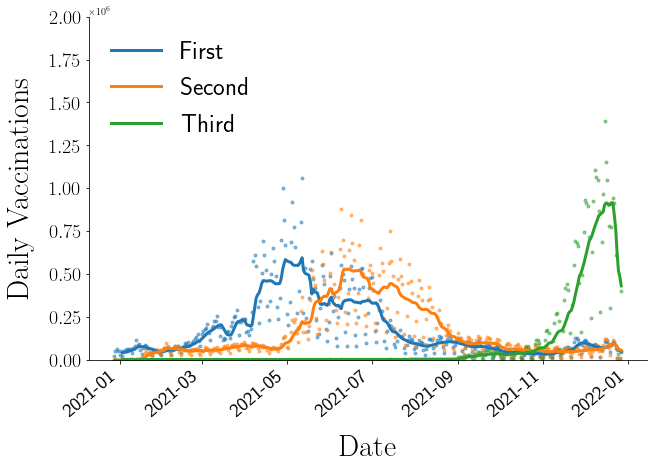

In [49]:
fig, ax = pt.singleplot()
pt.polyscatter(ax,data.date, data.erst_daily)
pt.polyscatter(ax,data.date, data.zweit_daily)
pt.polyscatter(ax,data.date, data.dritt_daily)

pt.majorline(ax,data.date, data.erst_rollingmean, label="First")
pt.majorline(ax,data.date, data.zweit_rollingmean, label="Second")
pt.majorline(ax,data.date, data.dritt_rollingmean, label="Third")


fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, pt.tex("Date"), pt.tex("Daily Vaccinations"))
pt.limits(ax, None, (0,2e6))


In [54]:
data=pd.read_table('https://raw.githubusercontent.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung/main/Nowcast_R_aktuell.csv',\
                  sep=",")


In [57]:
data

,Datum,PS_COVID_Faelle,UG_PI_COVID_Faelle,OG_PI_COVID_Faelle,PS_COVID_Faelle_ma4,UG_PI_COVID_Faelle_ma4,OG_PI_COVID_Faelle_ma4,PS_7_Tage_R_Wert,UG_PI_7_Tage_R_Wert,OG_PI_7_Tage_R_Wert
0,2020-03-02,304,292,319,225,213,238,NaN,NaN,NaN
1,2020-03-03,321,304,337,261,248,276,NaN,NaN,NaN
2,2020-03-04,448,430,467,326,311,342,NaN,NaN,NaN
3,2020-03-05,503,485,525,394,378,412,NaN,NaN,NaN
4,2020-03-06,757,732,783,507,488,528,2.34,2.28,2.39
...,...,...,...,...,...,...,...,...,...,...
658,2021-12-20,32048,28721,35222,28599,26099,30931,0.84,0.81,0.87
659,2021-12-21,27889,23709,31729,28571,25403,31481,0.83,0.80,0.86
660,2021-12-22,22253,18006,26096,27592,23958,30913,0.79,0.76,0.83
661,2021-12-23,16169,11447,20668,24590,20471,28429,0.75,0.71,0.79


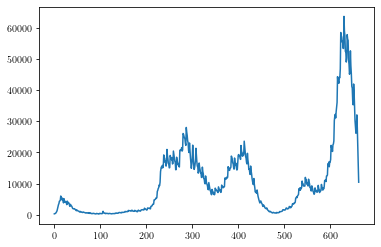

In [60]:
plt.plot(data.PS_COVID_Faelle)